In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Probability simulation


In [ ]:
def pay_func_1(x):
  return 2**x
def pay_func_2(x):
  return x**2
def pay_func_3(x):
  return x**5

In [ ]:
def play_game(pay_func, success_rate=0.5, rounds_num=100, max_steps=100, step_cost=10):
    total_earnings = 0
    for round in range(rounds_num):
        successful_steps = 0
        for step in range(max_steps):
            if np.random.rand() < success_rate:
                successful_steps += 1
            else:
                total_earnings += pay_func(successful_steps) - success_rate * step_cost
                break
    return total_earnings


# Basic test for correctness

In [ ]:
# trying to find the balance point for func_1

def find_balance_point(num_of_sims = 1000
                      ,num_of_rounds = 100
                      ,steps_max = 100
                      ,step_cost = 10
                      ,pay_func = pay_func_1
                      ,granularity = 0.02
                      ,play_game_func = play_game):
  # params
  closest_rate_to_zero = 0.0
  closest_earning_to_zero = 0
  sims_earnings = np.array([np.zeros(num_of_sims) for i in range(int(1/granularity))])
  average_earnings = np.zeros(int(1/granularity))

  for i  in range(1,int(1/granularity)):
    current_rate = granularity * (i)
    for j in range(num_of_sims):
      sims_earnings[i][j] = play_game_func(pay_func=pay_func,success_rate=current_rate,rounds_num= num_of_rounds,max_steps= steps_max,step_cost=step_cost)

    total_earnings = np.sum(sims_earnings[i])
    average_earnings[i] = total_earnings / num_of_sims
  # taking min
  for i in range(1,int(1/granularity)):
      if(np.abs(average_earnings[i]) < np.abs(closest_earning_to_zero)) or (i == 1):
        closest_earning_to_zero = average_earnings[i]
        closest_rate_to_zero = granularity * (i) #current rate

  return (closest_rate_to_zero,closest_earning_to_zero)


# basic check
out_put = find_balance_point(num_of_sims = 1000
                      ,num_of_rounds = 100
                      ,steps_max = 100
                      ,step_cost = 10
                      ,pay_func = pay_func_1
                      ,granularity = 0.02
                      ,play_game_func = play_game)
print(out_put)

(0.12, -4.260000000000001)


# Test benchmark speed {For functions variations of "Play_Game"}

In [ ]:
import numpy as np
import time

# Timing original version
print("play_game benchmark:")
start_time = time.time()
find_balance_point(num_of_sims = 500
                      ,num_of_rounds = 100
                      ,steps_max = 100
                      ,step_cost = 10
                      ,pay_func = pay_func_1
                      ,granularity = 0.02
                      ,play_game_func = play_game)
end_time = time.time()
execution_time_original = end_time - start_time

print("Execution time of original code:", execution_time_original)


play_game benchmark:
Execution time of original code: 5.8914549350738525


#Remarks:
- my original code performs better for not so high success rates than the numpy "optimized" version where I would pre generate the random values then check for succes rate .
Since for higher success rates it is more common to reach the max steps, therefore pre randomizing them in the optimized code proves to be more effiecient and stable than the general case.
- In the general case , for not so high success rates, my original code breaks the inner loop of each round rather early on average.

#Balance point per step_cost plotting

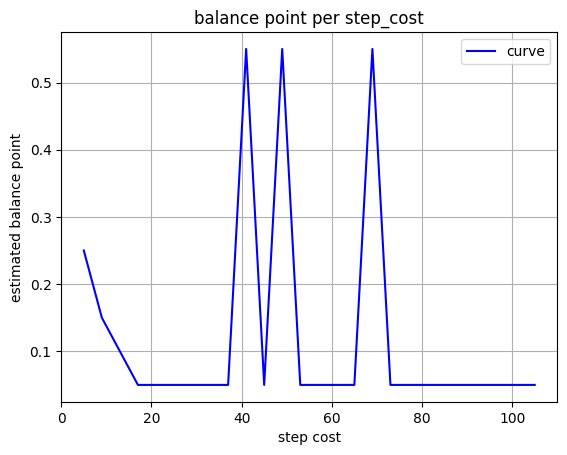

In [ ]:
step_cost_min = 5
step_cost_max = 105
sample_size = 26
possible_costs = np.linspace(step_cost_min, step_cost_max, num=sample_size)
balance_points = np.zeros(sample_size)
# Estimate balance points
for i in range(sample_size):
  output = find_balance_point(num_of_sims = 200
                      ,num_of_rounds = 200
                      ,steps_max = 1000
                      ,step_cost = possible_costs[i]
                      ,pay_func = pay_func_1
                      ,granularity = 0.05
                      ,play_game_func = play_game)
  balance_points[i] = output[0]


# data
x = possible_costs
y = balance_points

# Plot
plt.plot(x, y, color='blue',label = "curve", linestyle='-')
plt.title('balance point per step_cost')  # Set title
plt.xlabel('step cost')  # Set x-axis label
plt.ylabel('estimated balance point')  # Set y-axis label
plt.grid(True)  # Show grid
plt.legend()  # Show legend
plt.show()  # Display the plot